https://udlbook.github.io/udlbook/

https://github.com/udlbook/udlbook/blob/main/Notebooks/Chap06/6_4_Momentum.ipynb

# **Блокнот 6.4: Momentum**

В этой блокноте рассматривается использование momentum, как показано на рисунке 6.7 из книги.

Пройдитесь по ячейкам ниже, проверяя каждую ячейку по очереди. В разных местах вы увидите метку "TODO". Следуйте инструкциям в этих местах и сделайте прогнозы о том, что произойдет, или напишите код для выполнения функций.




In [1]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [2]:
# Давайте создадим наши обучающие данные из 30 пар {x_i, y_i}
# Мы попытаемся подогнать модель Габора к этим данным
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])

In [3]:
# Давайте определим нашу модель
def model(phi,x):
  sin_component = np.sin(phi[0] + 0.06 * phi[1] * x)
  gauss_component = np.exp(-(phi[0] + 0.06 * phi[1] * x) * (phi[0] + 0.06 * phi[1] * x) / 32)
  y_pred= sin_component * gauss_component
  return y_pred

In [4]:
# Нарисуем модель
def draw_model(data,model,phi,title=None):
  x_model = np.arange(-15,15,0.1)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([-15,15]);ax.set_ylim([-1,1])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  if title is not None:
    ax.set_title(title)
  plt.show()

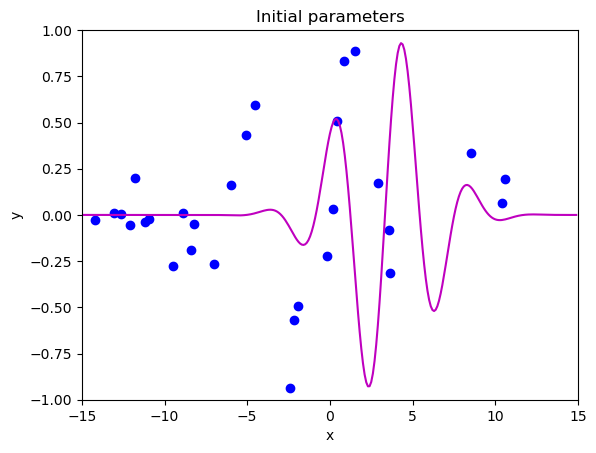

In [5]:
# Инициализируем параметры и нарисуем модель
phi = np.zeros((2,1))
phi[0] =  -5     # Горизонтальное смещение (horizontal offset)
phi[1] =  25     # Частота (frequency)
draw_model(data,model,phi, "Initial parameters")


Теперь давайте напишем код расчета квадратичной функции потерь и построим ее график

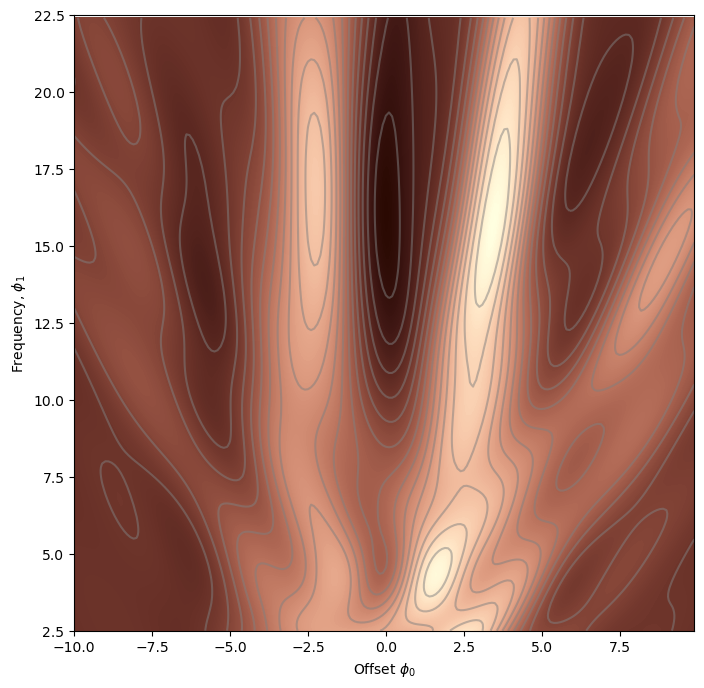

In [6]:
def compute_loss(data_x, data_y, model, phi):
  pred_y = model(phi, data_x)
  loss = np.sum((pred_y-data_y)*(pred_y-data_y))
  return loss

def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Определим красивую цветовую схему
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Создадим сетку значений пересечения/наклона (intercept/slope) для построения графика
  offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10,10.0,0.1), np.arange(2.5,22.5,0.1))
  loss_mesh = np.zeros_like(freqs_mesh)
  # Вычислим функцию потерь для каждого набора параметров
  for idslope, slope in np.ndenumerate(freqs_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[offsets_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(offsets_mesh,freqs_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(offsets_mesh,freqs_mesh,loss_mesh,20,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([2.5,22.5])
  ax.set_xlabel('Offset $\phi_{0}$'); ax.set_ylabel('Frequency, $\phi_{1}$')
  plt.show()

draw_loss_function(compute_loss, data, model)

Как и раньше, давайте вычислим вектор градиента для заданного набора параметров:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [7]:
# Эти формулы получены в результате записи выражения для суммы квадратов потерь и расчета
# производных по phi0 и phi1. Это требует внимательности для получения правильного решения
def gabor_deriv_phi0(data_x,data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2* deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def gabor_deriv_phi1(data_x, data_y,phi0, phi1):
    x = 0.06 * phi1 * data_x + phi0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x *x / 16)
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x*sin_component * gauss_component * x / 16
    deriv = 2*deriv * (sin_component * gauss_component - y)
    return np.sum(deriv)

def compute_gradient(data_x, data_y, phi):
    dl_dphi0 = gabor_deriv_phi0(data_x, data_y, phi[0],phi[1])
    dl_dphi1 = gabor_deriv_phi1(data_x, data_y, phi[0],phi[1])
    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

Давайте сначала запустим стандартный стохастический градиентный спуск.

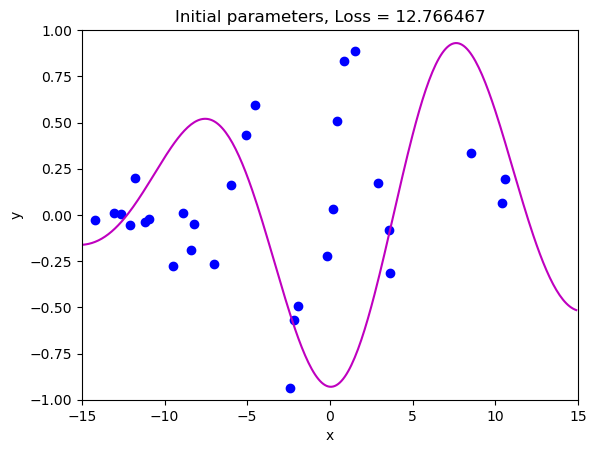

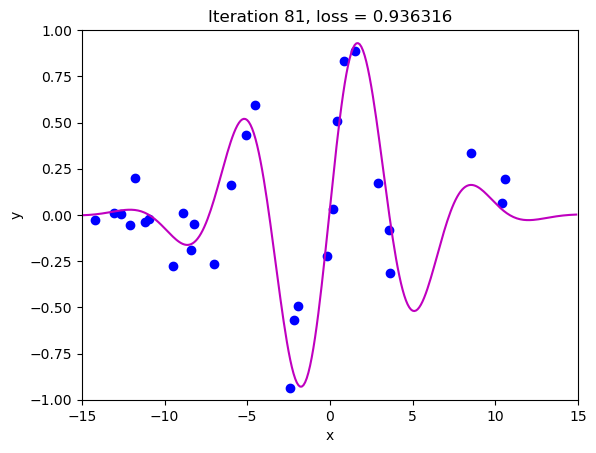

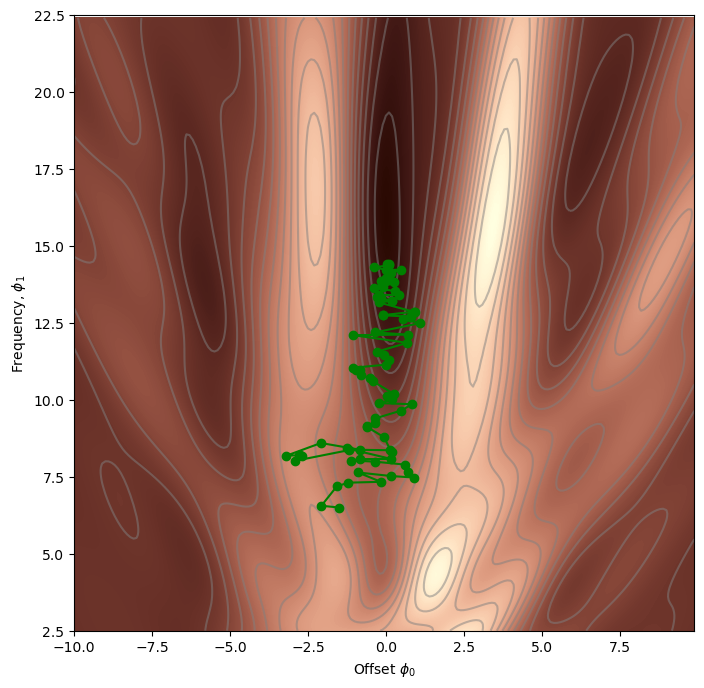

In [8]:
# Установим генератор случайных чисел так, чтобы мы всегда получали одинаковые числа (отключите, если вы этого не хотите)
np.random.seed(1)
# Инициализируем параметры
n_steps = 81
batch_size = 5
alpha = 0.6
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 6.5

# Измерим потери (loss) и нарисуем исходную модель
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Выберем случайные индексы для формирования батча
  batch_index = np.random.permutation(data.shape[1])[0:batch_size]
  # Вычислим градиент
  gradient = compute_gradient(data[0,batch_index], data[1,batch_index], phi_all[:,c_step:c_step+1] )
  # Обновим параметры
  phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - alpha * gradient

loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))
draw_loss_function(compute_loss, data, model,phi_all)

Теперь давайте добавим momentum (уравнение 6.11)

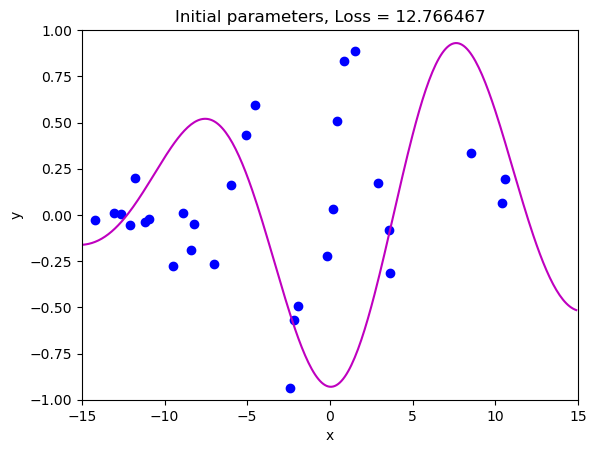

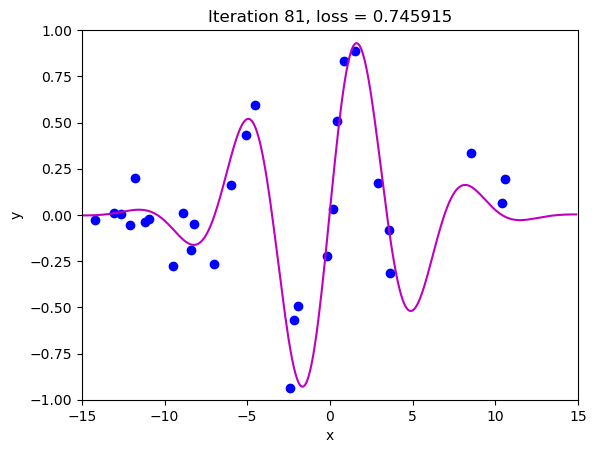

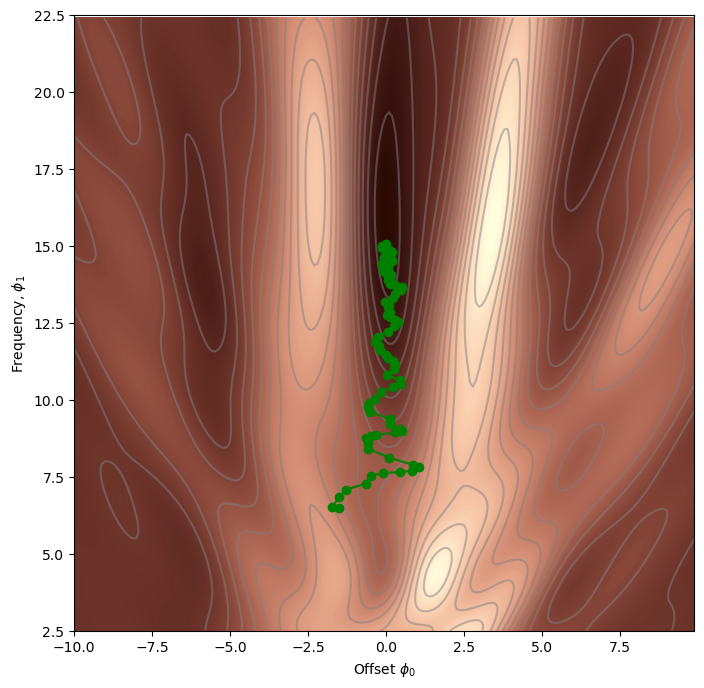

In [19]:
# Установим генератор случайных чисел так, чтобы мы всегда получали одинаковые числа (отключите, если вы этого не хотите)
np.random.seed(1)
# Инициализируем параметры
n_steps = 81
batch_size = 5
alpha = 0.6
beta = 0.6
momentum = np.zeros([2,1])
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 6.5

# Измерим потери (loss) и нарисуем исходную модель
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Выберем случайные индексы для формирования батча
  batch_index = np.random.permutation(data.shape[1])[0:batch_size]
  # Вычислим градиент
  gradient = compute_gradient(data[0,batch_index], data[1,batch_index],  phi_all[:,c_step:c_step+1])
  # TODO - рассчитайте momentum - замените строку ниже
  momentum = beta*momentum + (1-beta) * gradient
    
  # Обновим параметры
  phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - alpha * momentum

loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))
draw_loss_function(compute_loss, data, model,phi_all)

Наконец, опробуем метод Нестерова (Nesterov momentum)  (уравнение 6.12)

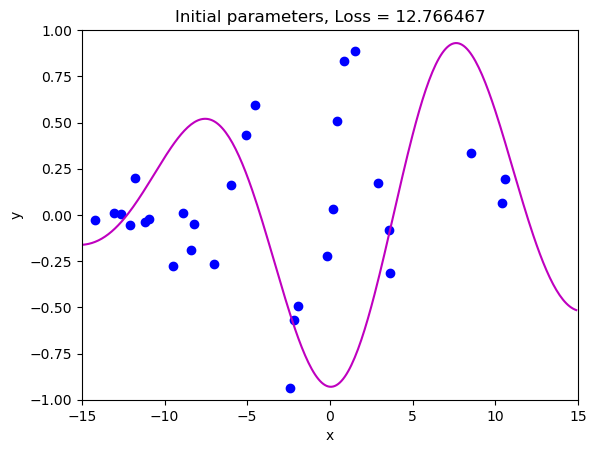

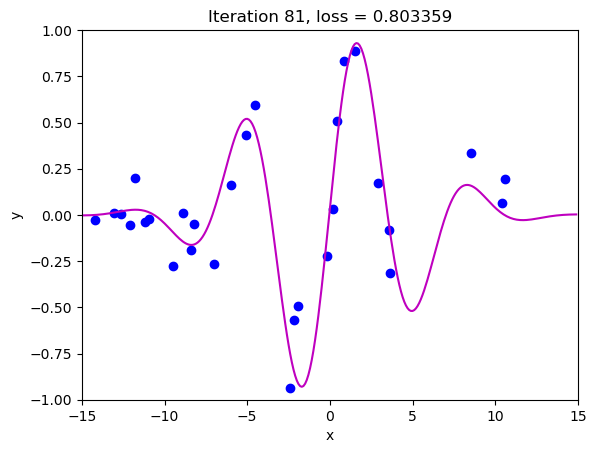

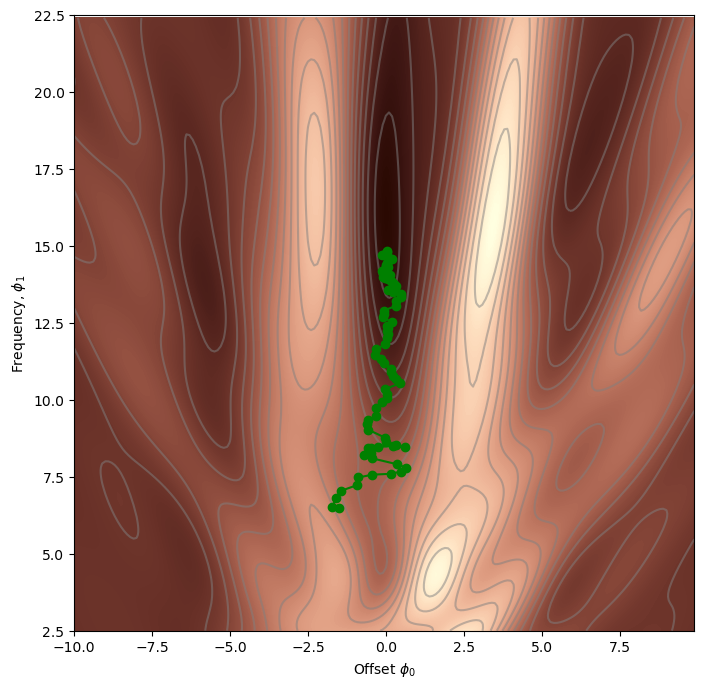

In [23]:
# Установим генератор случайных чисел так, чтобы мы всегда получали одинаковые числа (отключите, если вы этого не хотите)
np.random.seed(1)
# Инициализируем параметры
n_steps = 81
batch_size = 5
alpha = 0.6
beta = 0.6
momentum = np.zeros([2,1])
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = -1.5
phi_all[1,0] = 6.5

# Измерим потери (loss) и нарисуем исходную модель
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Выберем случайные индексы для формирования батча
  batch_index = np.random.permutation(data.shape[1])[0:batch_size]
  # TODO - рассчитайте Nesterov momentum - замените строки ниже
  gradient = compute_gradient(data[0,batch_index], data[1,batch_index],  phi_all[:,c_step:c_step+1]-alpha*momentum)
  momentum = beta*momentum + (1-beta) * gradient

  # Обновим параметры
  phi_all[:,c_step+1:c_step+2] = phi_all[:,c_step:c_step+1] - alpha * momentum
  print()

loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))
draw_loss_function(compute_loss, data, model,phi_all)

Обратите внимание, что в данном случае метод Нестерова (Nesterov momentum) не улучшает результат.